# LightGBM

- XGBoost와 부스팅 계열 알고리즘에서 가장 각광을 받고 있음

https://lightgbm.readthedocs.io/en/latest/

https://en.wikipedia.org/wiki/LightGBM


### LightGBM의 장점
- XGBoost 대비 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할

### LightGBM의 단점
- 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움

### 기존 GBM과의 차이점
- 일반적인 균형트리분할(Level Wise) 방식과 달리 **`리프중심 트리분할(Leaf Wise)`** 방식을 사용
- 예측 오류 손실을 최소화하고자 함
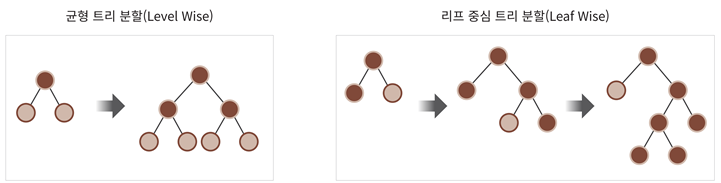

**사이킷런의 Estimator를 상속받아 fit(), predict() 기반의 학습과 예측, 사이킷런의 다양한 유틸리티 활용 가능**

## LightGBM 설치
- 아나콘다를 통해 설치
- 윈도우에 설치할 경우 Visual Studio tool 2015 이상이 먼저 설치되어 있어야 함
    - https://visualstudio.microsoft.com/ko/downloads/
    
- 아나콘다 프롬프트를 관리자 권한으로 실행한 후 conda 명령어 수행

**`conda install -c conda-forge lightgbm`**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lightgbm 버전 확인
import lightgbm
lightgbm.__version__

'3.3.2'

### LightGBM 하이퍼파라미터

- XGBoost와 매우 유사함
- 유의할 점 :
    - 리프 노드가 계속 분할하면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터 설정이 필요
    
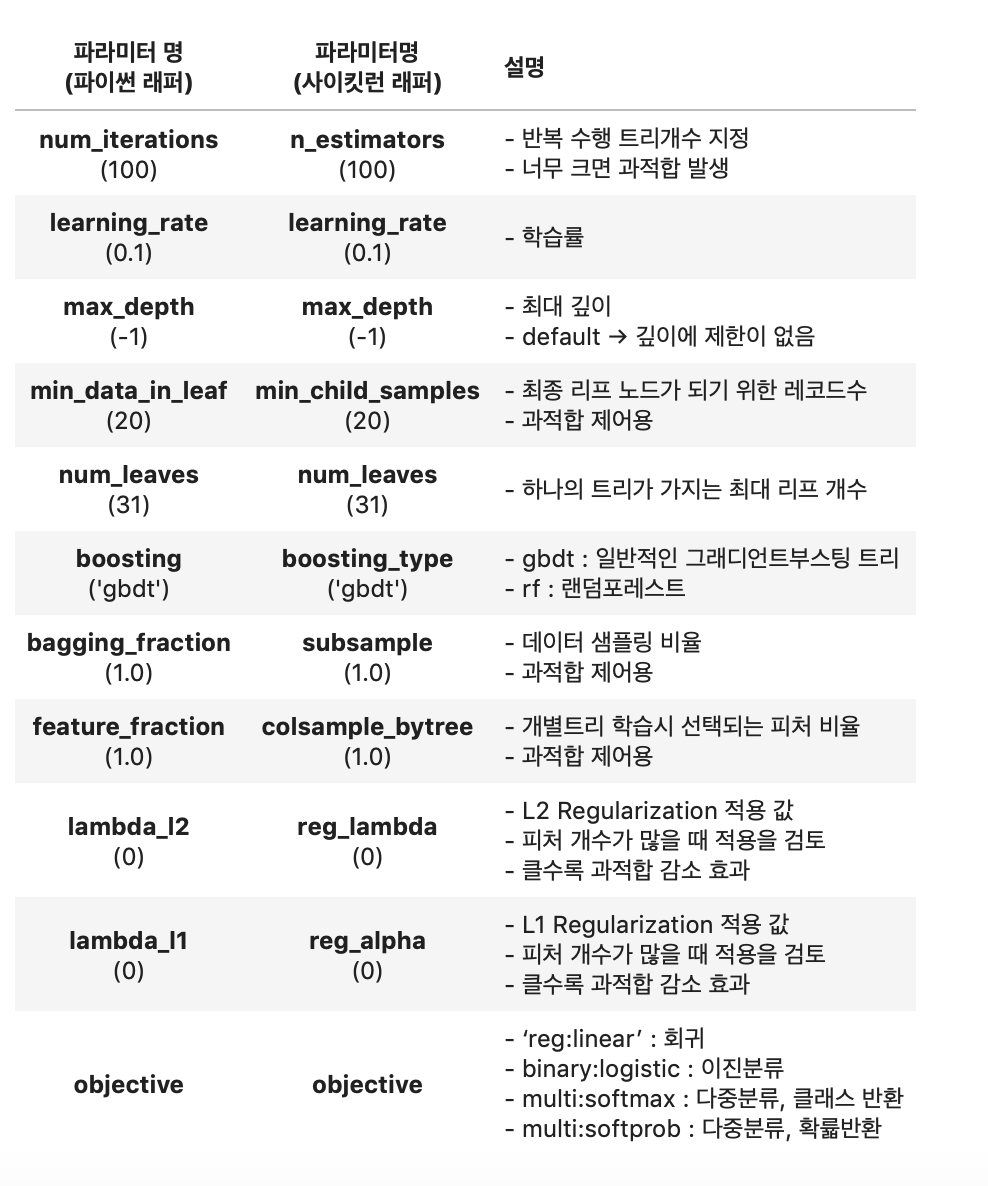

### 하이퍼 파라미터 튜닝 방안

1. num_leaves 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것

    
2. learning_rate를 작게 하면서 n_estimations를 크게 하는 것


3. 과적합을 제어하기 위해서 reg_lambda, reg_alpha와 같은 regularization을 적용


4. 학습 데이터에 사용할 피처 수나 데이터 샘플링 레코드 개수를 줄임
    - colsample_bytree, subsample 파라미터를 적용
        
        


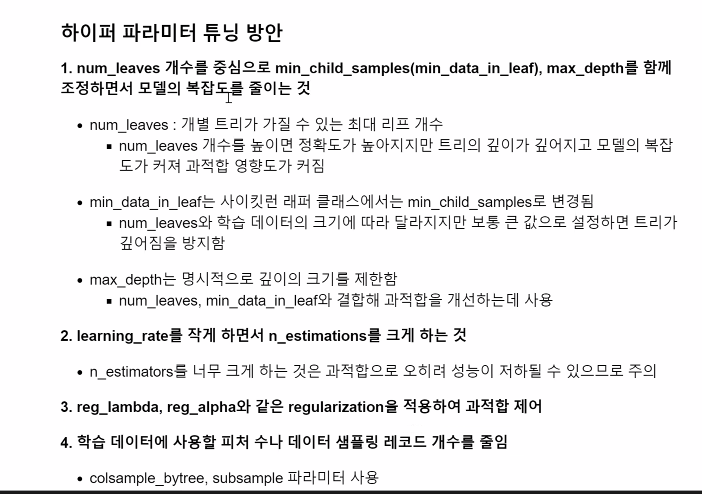

## LightGBM, XGBoost, LightGBM 하이퍼파라미터 비교
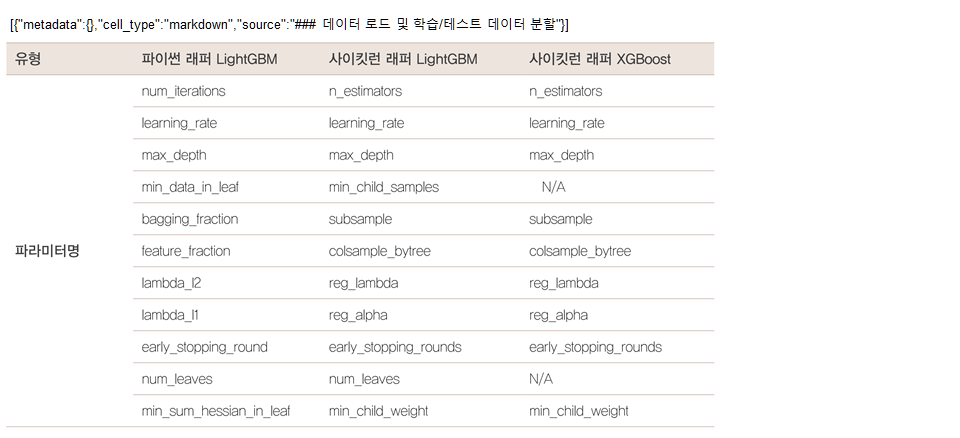

## LightGBM 적용한 위스콘신 유방암 예측

### LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트

In [4]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

### 데이터 로드 및 학습/테스트 데이터 분할

In [5]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

### LightGBM으로 학습

In [6]:
# XGBoost와 동일하게 n_estimators=400 설정 
lgbm_clf = LGBMClassifier(n_estimators=400)

# 학습 : 조기 중단 수행 가능(XGBoost와 동일함)
# logloss : 2진 분류라서
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, 
             eval_metric='logloss', 
             eval_set=[(X_test, y_test)], 
             verbose=True)

# 예측
pred = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

### LightGBM 기반 예측 성능 평가

In [7]:
# 성능 평가 함수 get_clf_eval(y_test, pred=None, pred_proba=None) 

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [8]:
get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,F1: 0.9682, AUC:0.9905


### plot_importance( )를 이용하여 feature 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

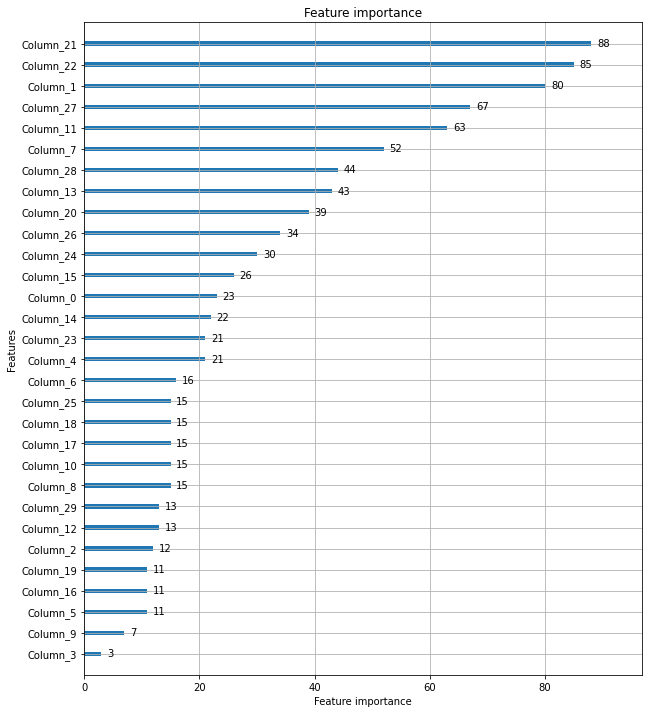

In [10]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)